In [1]:
#前準備
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import re

#データの読み込み
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stadium = pd.read_csv("stadium.csv")
new = pd.read_csv("train_new.csv")
new_test = pd.read_csv("test_new.csv")

#目的変数の設定
y = np.array(new.loc[:,["y"]])
y.dtype

dtype('int64')

In [2]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [3]:
#ダミー変数化からのマッピング
def namefeat_to_map(data1,name):
    data = pd.concat([data1,pd.get_dummies(data1[name])],axis = 1)
    corr_data = data.corr()
    name_corr = corr_data.loc[:,["y"]]
    name_corr = name_corr.iloc[len(data1.corr().columns):,:]
    name_corr = name_corr.sort_values(by = ["y"],ascending= False)
    columns_name = pd.DataFrame(name_corr.index)


    name_corr = np.array(name_corr)
    name_corr = pd.DataFrame(name_corr)


    name_corr = pd.concat([name_corr,columns_name],axis  =1)

    name_corr.columns = ["corr","label"]


    name_mapping = {}
    num_range = len(name_corr)
    for i in range(num_range):
        name_mapping[name_corr.iloc[i,1]] = name_corr.iloc[i,0]
    
    data[name] = data[name].map(name_mapping)

    drop_colu = name_corr.loc[:,"label"]
    data = data.drop(drop_colu,axis = 1)
    return data

In [4]:
#ダミー変数化からのマッピング(マップ取り出し用
def namefeat_map(data1,name):
    data = pd.concat([data1,pd.get_dummies(data1[name])],axis = 1)
    corr_data = data.corr()
    name_corr = corr_data.loc[:,["y"]]
    name_corr = name_corr.iloc[len(data1.corr().columns):,:]
    name_corr = name_corr.sort_values(by = ["y"],ascending= False)
    columns_name = pd.DataFrame(name_corr.index)


    name_corr = np.array(name_corr)
    name_corr = pd.DataFrame(name_corr)


    name_corr = pd.concat([name_corr,columns_name],axis  =1)

    name_corr.columns = ["corr","label"]


    name_mapping = {}
    num_range = len(name_corr)
    for i in range(num_range):
        name_mapping[name_corr.iloc[i,1]] = name_corr.iloc[i,0]
    
    return name_mapping

In [5]:
new.shape

(1953, 43)

In [6]:
#データの確認(欠損値、特徴量

print(new.isnull().sum())
new.columns

id             0
y              0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
address        0
capa           0
dtype: int64


Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa'],
      dtype='object')

<function matplotlib.pyplot.show>

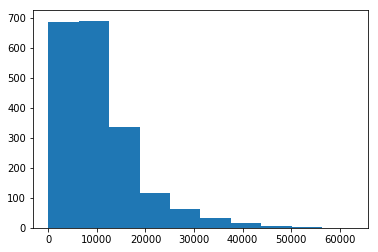

In [7]:
plt.hist(y)
plt.show

In [8]:
#データの加工（変数"stage"のマッピング

stage_mapping = {"Ｊ１":1,"Ｊ２":2}

new["stage"] = new["stage"].map(stage_mapping)

In [9]:
#変数"weather"のマッピング
for i in range(1953):
    if(new.loc[i,"weather"] == "雨"):
       new.loc[i,"weather"] = 0
    else:
       new.loc[i,"weather"] = 1

In [10]:
humi = pd.DataFrame(new.loc[:,["humidity"]])
pattern = re.compile(r"[0-9]+")
for i in range(1953):
    humi_str = humi.iloc[i,0]
    humi_list = pattern.findall(humi_str)
    humi.iloc[i,0]= int(humi_list[0])
new["humidity"] = humi

In [11]:
#new = pd.concat([new,pd.get_dummies(new["home"])],axis = 1)
#new = new.drop('ＦＣ町田ゼルビア', axis=1)
#new = new.drop('ガイナーレ鳥取', axis=1)
#new = new.drop('ザスパ草津', axis=1)

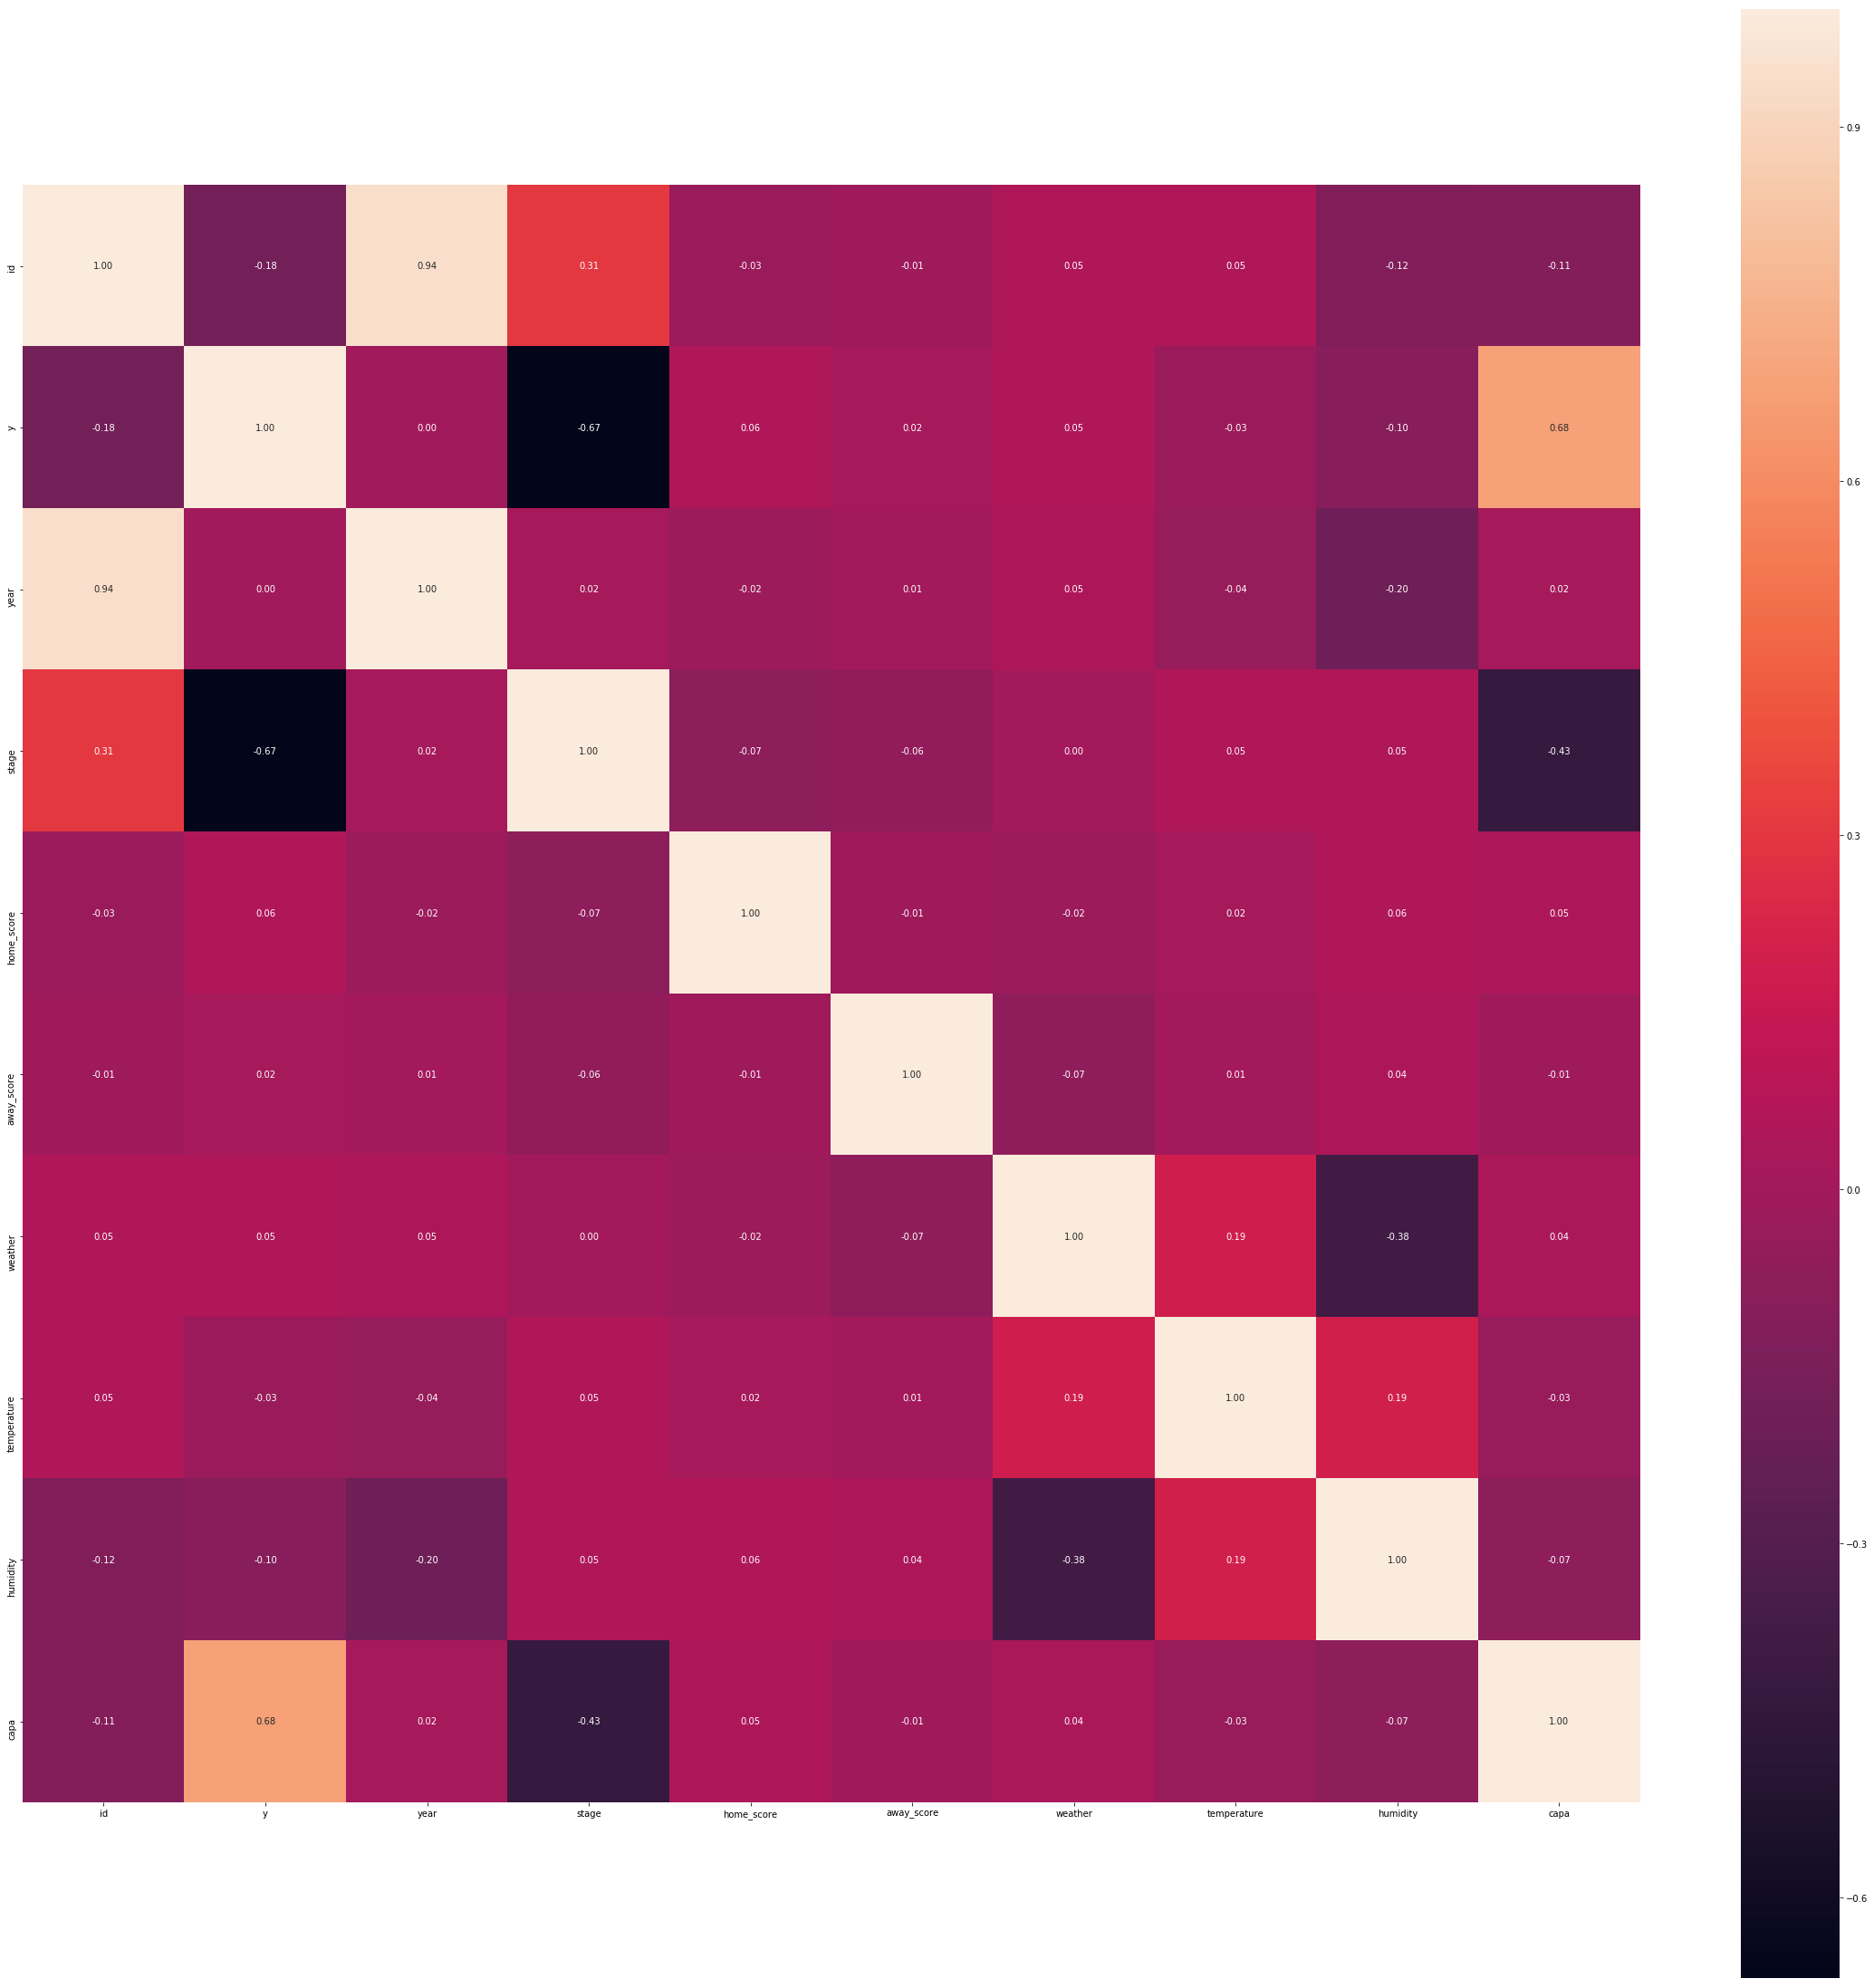

In [12]:
# ヒートマップの表示

plt.figure(figsize=(40, 40))
sns.heatmap(new.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [13]:
home_mapping = namefeat_map(new,"home")
away_mapping  = namefeat_map(new,"away")
new = namefeat_to_map(new,"home")
new = namefeat_to_map(new,"away")
referee_mapping  = namefeat_map(new,"referee")
new = namefeat_to_map(new,"referee")

In [14]:
new.corr()

,id,y,year,stage,home,away,home_score,away_score,weather,temperature,humidity,referee,capa
id,1.000000,-0.177472,0.942622,0.306143,-0.219061,-0.263625,-0.025435,-0.008785,0.051062,0.049774,-0.124472,-0.179097,-0.109910
y,-0.177472,1.000000,0.002161,-0.668457,0.858757,0.666478,0.056407,0.018340,0.052766,-0.027614,-0.099168,0.487571,0.684865
year,0.942622,0.002161,1.000000,0.021468,-0.008012,-0.015803,-0.019938,0.006432,0.047344,-0.041344,-0.197296,-0.013614,0.016675
stage,0.306143,-0.668457,0.021468,1.000000,-0.743502,-0.868135,-0.070583,-0.057542,0.004084,0.050707,0.054396,-0.579494,-0.430756
home,-0.219061,0.858757,-0.008012,-0.743502,1.000000,0.636925,0.116382,-0.031935,-0.013932,-0.046175,-0.063541,0.503530,0.683940
away,-0.263625,0.666478,-0.015803,-0.868135,0.636925,1.000000,0.014775,0.141170,0.001055,-0.040754,-0.048160,0.553695,0.398741
home_score,-0.025435,0.056407,-0.019938,-0.070583,0.116382,0.014775,1.000000,-0.008733,-0.017265,0.016618,0.060792,0.079823,0.046465
away_score,-0.008785,0.018340,0.006432,-0.057542,-0.031935,0.141170,-0.008733,1.000000,-0.065125,0.012507,0.042581,0.062495,-0.007378
weather,0.051062,0.052766,0.047344,0.004084,-0.013932,0.001055,-0.017265,-0.065125,1.000000,0.190156,-0.375572,0.000895,0.035891
temperature,0.049774,-0.027614,-0.041344,0.050707,-0.046175,-0.040754,0.016618,0.012507,0.190156,1.000000,0.193137,-0.059185,-0.032150


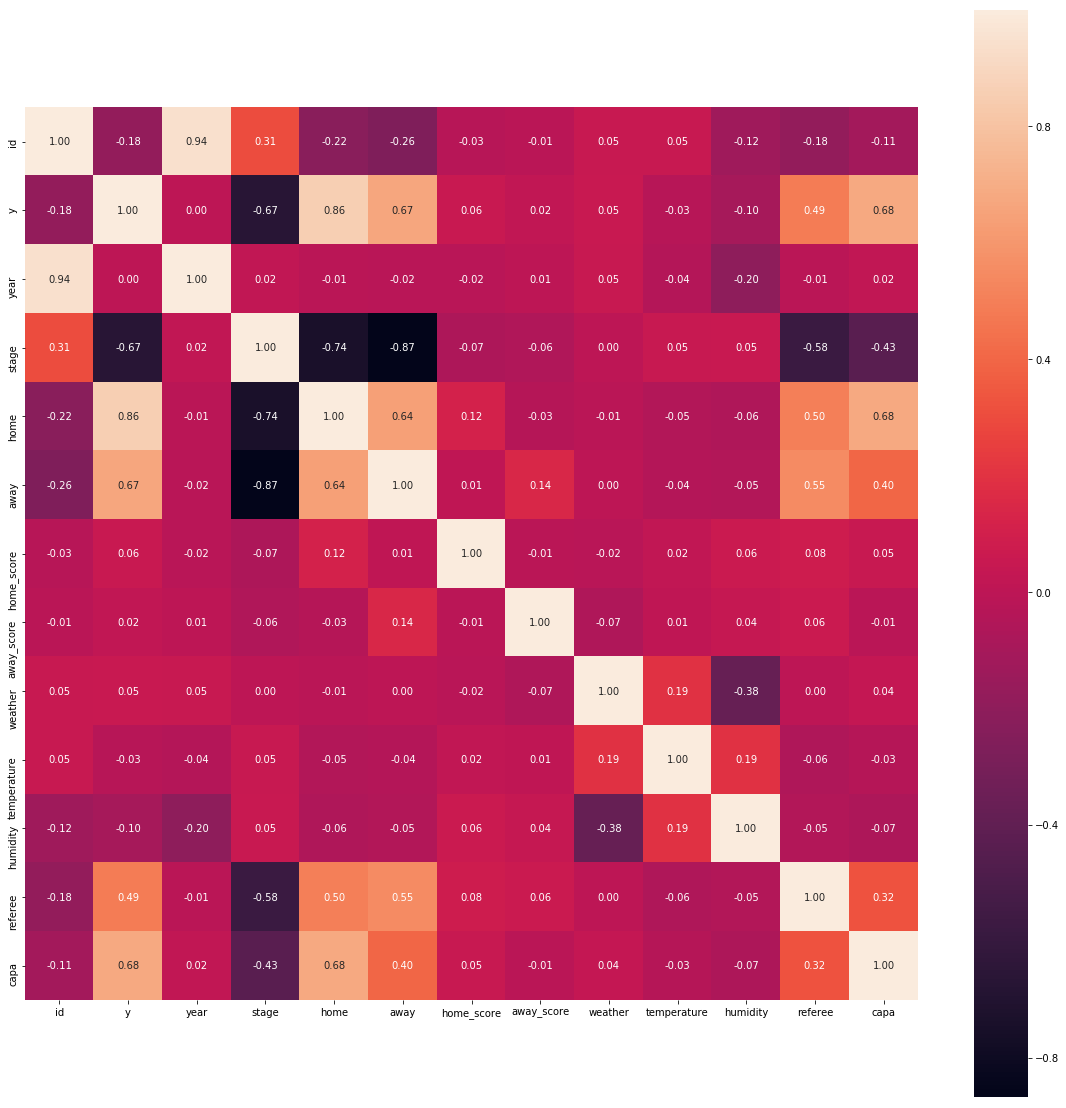

In [15]:
# ヒートマップの表示

plt.figure(figsize=(20, 20))
sns.heatmap(new.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [16]:
print(new.isnull().sum())

id             0
y              0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
address        0
capa           0
dtype: int64


In [17]:
X = np.array(new.loc[:,["capa","year","stage","home_score","away_score","humidity","temperature", "home","away","weather","referee"]])

In [18]:
# データの前処理（主成分分析のためのデータの標準化
#scaler = StandardScaler()
#scaler.fit(X)                   # 与えられた行列の各特徴量について､平均と標準偏差を算出
#X_std = scaler.fit_transform(X) # Xを標準化した行列を生成
# 主成分分析を実行
#from sklearn.decomposition import PCA
#pca = PCA(n_components=10) # 主成分をnつまで取得
#X_pca = pca.fit_transform(X_std)
#X_pca

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
# n次関数の変数変換
# n次の多項式規定を生成
cubic = PolynomialFeatures(degree=2)
# 生成した基底関数で変数変換を実行
lstat_cubic = cubic.fit_transform(X_train)
lstat_cubic2 = cubic.fit_transform(X_test)

# 線形回帰のインスタンスを生成
model_cubic = LinearRegression()

# 変換後の変数を利用して実行
model_cubic.fit(lstat_cubic, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(model_cubic.score(lstat_cubic, y_train), len(y_train), 2))
print('test : %3f' % adjusted(model_cubic.score(lstat_cubic2, y_test), len(y_test), 2))

adjusted R^2
train: 0.844537
test : 0.767710


In [21]:
new_test

,id,year,stage,match,gameday,time,home,away,stadium,tv,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,...,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン,宮城県仙台市泉区七北田字柳78,19694
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,...,水本 裕貴,柏 好文,柴﨑 晃誠,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,茨城県鹿嶋市神向寺後山26-2,40728
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,...,大屋 翼,橋本 英郎,杉浦 恭平,奥井 諒,高橋 峻希,小川 慶治朗,森岡 亮太,マルキーニョス,埼玉県さいたま市緑区中野田500,63700
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス,...,谷口 彰悟,登里 享平,大島 僚太,中村 憲剛,森谷 賢太郎,金久保 順,小林 悠,大久保 嘉人,千葉県柏市日立台1-2-50,15349
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス,...,安藤 淳,山下 達也,扇原 貴宏,山口 蛍,キム ソンジュン,フォルラン,南野 拓実,杉本 健勇,新潟県新潟市中央区清五郎67-12,42300
5,15828,2014,Ｊ１,第１８節第１日,08/02(土),18:03,ガンバ大阪,横浜Ｆ・マリノス,万博記念競技場,スカパー！／スカパー！プレミアムサービス,...,中澤 佑二,下平 匠,小椋 祥平,中町 公祐,兵藤 慎剛,中村 俊輔,齋藤 学,伊藤 翔,大阪府吹田市千里万博公園5-2,21000
6,15829,2014,Ｊ１,第１８節第１日,08/02(土),18:34,徳島ヴォルティス,ヴァンフォーレ甲府,鳴門・大塚スポーツパーク ポカリスエットスタジアム,スカパー！／スカパー！プレミアムサービス,...,佐々木 翔,稲垣 祥,新井 涼平,マルキーニョス パラナ,阿部 翔平,阿部 拓馬,ジウシーニョ,クリスティアーノ,徳島県鳴門市撫養町立岩字四枚61,19637
7,15830,2014,Ｊ１,第１８節第１日,08/02(土),19:04,サガン鳥栖,名古屋グランパス,ベストアメニティスタジアム,スカパー！／スカパー！プレミアムサービス,...,大武 峻,本多 勇喜,松田 力,ダニルソン,田口 泰士,レアンドロ ドミンゲス,玉田 圭司,永井 謙佑,佐賀県鳥栖市京町812,24490
8,15831,2014,Ｊ１,第１９節第１日,08/09(土),19:04,大宮アルディージャ,ガンバ大阪,ＮＡＣＫ５スタジアム大宮,スカパー！／スカパー！プレミアムサービス／テレ玉,...,岩下 敬輔,オ ジェソク,今野 泰幸,遠藤 保仁,阿部 浩之,倉田 秋,宇佐美 貴史,パトリック,埼玉県さいたま市大宮区高鼻町4,15600
9,15832,2014,Ｊ１,第１９節第１日,08/09(土),19:04,川崎フロンターレ,浦和レッズ,等々力陸上競技場,スカパー！／スカパー！プレミアムサービス,...,槙野 智章,平川 忠亮,鈴木 啓太,阿部 勇樹,宇賀神 友弥,柏木 陽介,梅崎 司,興梠 慎三,神奈川県川崎市中原区等々力1-1,26530


In [22]:
new_test["home"] = new_test["home"].map(home_mapping)
new_test["away"] = new_test["away"].map(away_mapping)
new_test["referee"] = new_test["referee"].map(referee_mapping)
#データの加工（変数"stage"のマッピング
stage_mapping = {"Ｊ１":1,"Ｊ２":2}

new_test["stage"] = new_test["stage"].map(stage_mapping)

for i in range(313):
    if(new_test.loc[i,"weather"] == "雨"):
       new_test.loc[i,"weather"] = 0
    else:
       new_test.loc[i,"weather"] = 1

In [23]:
humi1 = pd.DataFrame(new_test.loc[:,["humidity"]])
for i in range(313):
    humi_str = humi1.iloc[i,0]
    humi_list = pattern.findall(humi_str)
    humi1.iloc[i,0]= int(humi_list[0])
new_test["humidity"] = humi1

In [24]:
new_test

,id,year,stage,match,gameday,time,home,away,stadium,tv,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,15822,2014,1,第１８節第１日,08/02(土),19:04,0.086465,0.093605,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス,...,横山 知伸,高橋 祥平,橋本 晃司,和田 拓也,家長 昭博,富山 貴光,ムルジャ,ズラタン,宮城県仙台市泉区七北田字柳78,19694
1,15823,2014,1,第１８節第１日,08/02(土),18:34,0.094899,0.146894,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス,...,水本 裕貴,柏 好文,柴﨑 晃誠,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,茨城県鹿嶋市神向寺後山26-2,40728
2,15824,2014,1,第１８節第１日,08/02(土),19:04,0.477030,0.015376,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉,...,大屋 翼,橋本 英郎,杉浦 恭平,奥井 諒,高橋 峻希,小川 慶治朗,森岡 亮太,マルキーニョス,埼玉県さいたま市緑区中野田500,63700
3,15825,2014,1,第１８節第１日,08/02(土),19:03,0.041796,0.136439,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス,...,谷口 彰悟,登里 享平,大島 僚太,中村 憲剛,森谷 賢太郎,金久保 順,小林 悠,大久保 嘉人,千葉県柏市日立台1-2-50,15349
4,15827,2014,1,第１８節第１日,08/02(土),19:03,0.265842,0.169108,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス,...,安藤 淳,山下 達也,扇原 貴宏,山口 蛍,キム ソンジュン,フォルラン,南野 拓実,杉本 健勇,新潟県新潟市中央区清五郎67-12,42300
5,15828,2014,1,第１８節第１日,08/02(土),18:03,0.054076,0.129554,万博記念競技場,スカパー！／スカパー！プレミアムサービス,...,中澤 佑二,下平 匠,小椋 祥平,中町 公祐,兵藤 慎剛,中村 俊輔,齋藤 学,伊藤 翔,大阪府吹田市千里万博公園5-2,21000
6,15829,2014,1,第１８節第１日,08/02(土),18:34,-0.115021,0.006064,鳴門・大塚スポーツパーク ポカリスエットスタジアム,スカパー！／スカパー！プレミアムサービス,...,佐々木 翔,稲垣 祥,新井 涼平,マルキーニョス パラナ,阿部 翔平,阿部 拓馬,ジウシーニョ,クリスティアーノ,徳島県鳴門市撫養町立岩字四枚61,19637
7,15830,2014,1,第１８節第１日,08/02(土),19:04,0.033097,0.124872,ベストアメニティスタジアム,スカパー！／スカパー！プレミアムサービス,...,大武 峻,本多 勇喜,松田 力,ダニルソン,田口 泰士,レアンドロ ドミンゲス,玉田 圭司,永井 謙佑,佐賀県鳥栖市京町812,24490
8,15831,2014,1,第１９節第１日,08/09(土),19:04,0.002953,0.141491,ＮＡＣＫ５スタジアム大宮,スカパー！／スカパー！プレミアムサービス／テレ玉,...,岩下 敬輔,オ ジェソク,今野 泰幸,遠藤 保仁,阿部 浩之,倉田 秋,宇佐美 貴史,パトリック,埼玉県さいたま市大宮区高鼻町4,15600
9,15832,2014,1,第１９節第１日,08/09(土),19:04,0.118341,0.228743,等々力陸上競技場,スカパー！／スカパー！プレミアムサービス,...,槙野 智章,平川 忠亮,鈴木 啓太,阿部 勇樹,宇賀神 友弥,柏木 陽介,梅崎 司,興梠 慎三,神奈川県川崎市中原区等々力1-1,26530


In [25]:
print(new_test.isnull().sum())
new_test.columns

id             0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
address        0
capa           0
dtype: int64


Index(['id', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa'],
      dtype='object')

In [26]:
test_X = new_test.loc[:,["capa","year","stage","home_score","away_score","humidity","temperature", "home","away","weather","referee"]]

In [27]:
# 生成した基底関数で変数変換を実行
lstat_cubic_te = cubic.fit_transform(test_X)
ans2 = model_cubic.predict(lstat_cubic_te)

ans2

array([[12729.50094676],
       [15390.07785511],
       [31822.13763404],
       [11780.24479532],
       [26510.07909107],
       [12267.77176356],
       [ 6541.76599693],
       [14518.75601363],
       [11317.44318819],
       [20918.17297006],
       [23898.24776983],
       [12716.6238575 ],
       [19393.92899251],
       [13906.28694654],
       [12684.6254673 ],
       [11162.72678852],
       [38139.72793722],
       [ 9492.17250776],
       [18475.20593238],
       [12682.63315988],
       [ 8217.34557343],
       [13149.10354114],
       [15964.19208312],
       [ 9664.73009968],
       [27937.51331282],
       [10179.06953382],
       [18837.02678633],
       [13791.66151738],
       [16099.076231  ],
       [13958.11951756],
       [18070.48823714],
       [20324.22280169],
       [14163.3907392 ],
       [31085.10880017],
       [10058.33283854],
       [10438.02211285],
       [12631.7680161 ],
       [13989.52853131],
       [14806.71910477],
       [16904.44868803],


In [28]:
ans2_arr = pd.DataFrame(ans2)
ans2_id = pd.DataFrame(new_test.loc[:,["id"]])
#capaを超えないように調整
for i in range(313):
    if(ans2_arr[0][i]>new_test.loc[i,"capa"]):
        ans2_arr[0][i] = new_test.loc[i,"capa"]

In [29]:
ans2_fi = str(ans2[0,0])
read2 = pd.read_csv("ansid.csv")

ans2_arr.to_csv("ans3.csv",index = False,header = False)
read2_ans = pd.read_csv("ans3.csv")

read2[ans2_fi] = read2_ans
read2.to_csv("ver4.csv",index = False)

read2

,15822,12729.500946760178
0,15823,15390.077855
1,15824,31822.137634
2,15825,11780.244795
3,15827,26510.079091
4,15828,12267.771764
5,15829,6541.765997
6,15830,14518.756014
7,15831,11317.443188
8,15832,20918.172970
9,15833,23898.247770
